LeNet-5网络结构

In [1]:
%tensorflow_version 1.x

import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [4]:
from keras.datasets import mnist

(X0,Y0),(X1,Y1) = mnist.load_data()
print(X0.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


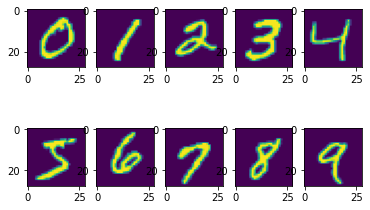

In [8]:
from matplotlib import pyplot as plt

plt.figure
fig,ax = plt.subplots(2,5)
ax = ax.flatten()

for i in range(10):
  Im = X0[Y0==i][0]
  ax[i].imshow(Im)
plt.show()

数据预处理

In [11]:
from keras.utils import np_utils

N0 = X0.shape[0]
N1 = X1.shape[0]
print([N0, N1])

X0 = X0.reshape(N0,28,28,1) / 255
X1 = X1.reshape(N1,28,28,1) / 255
YY0 = np_utils.to_categorical(Y0)
YY1 = np_utils.to_categorical(Y1)

[60000, 10000]


In [14]:
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras import Model

input_layer = Input([28, 28, 1])
x = input_layer
x = Conv2D(6, [5,5], padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=[2,2], strides=[2,2])(x)
x = Conv2D(16, [5,5], padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=[2,2], strides=[2,2])(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
output_layer = x

model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               4812

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X0, YY0, epochs=10, batch_size=200, validation_data=[X1,YY1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 485us/step - loss: 1.2523 - accuracy: 0.5792 - val_loss: 0.5354 - val_accuracy: 0.8316
Epoch 2/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.4423 - accuracy: 0.8638 - val_loss: 0.3538 - val_accuracy: 0.8891
Epoch 3/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.3285 - accuracy: 0.8978 - val_loss: 0.2744 - val_accuracy: 0.9135
Epoch 4/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.2612 - accuracy: 0.9189 - val_loss: 0.2161 - val_accuracy: 0.9323
Epoch 5/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.2141 - accuracy: 0.9335 - val_loss: 0.1724 - val_accuracy: 0.9463
Epoch 6/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.1789 - accuracy: 0.9449 - val_loss: 0.1548 - val_accuracy: 0.9503
Epoch 7/10
60000/60000 [==============================]